In [869]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo   

Cargamos los datasets

In [870]:
#df = pd.read_csv (r'C:\\Users\Practicas\Documents\Prediccion talleres\data\taller_operaciones.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\taller_operaciones.csv',sep=';')
df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\taller211227.csv',sep=';')
buses= pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\Fichas_buses.csv',sep=',')
df

,nomopera,aliasemp,nomempresa,taller_prove,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Tacografo,NaN,Cave Talleres,NaN,T305,0.0,18,45,MAN,SC7,353,Discrecional,Normal
1,Toldo turisticos,NaN,Cave Talleres,NaN,U205,32.0,10,81,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
2,Cambio filtro gasoil,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal
3,Potencia motor,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal
4,Fallo en EDC,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29913,Caja cambios,NaN,Cave Talleres,NaN,E660,3.0,43,5,FORD,MONDEO,NaN,TURISMO,NaN
29914,Cambio filtro gasoil,ESCRIBANO,Cave Talleres,NaN,X116,14.0,22,23,IVECO,TOURING III,331,Discrecional,Normal
29915,Cambiar/limpiar filtros,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal
29916,Precalentador,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal


Con en dataset buses se pretende rellenar los errores  en las potencias del dataset original

In [871]:
buses= buses[['codigbus','potencia']]
buses

,codigbus,potencia
0,﻿G080,324
1,54HC,338
2,58HC,338
3,61HC,280
4,62HC,310
...,...,...
541,X115,122
542,X116,331
543,X117,353
544,X118,226


In [872]:
df=df.merge(buses, how='left', left_on=['v_codigbus'], right_on=['codigbus'])
df

,nomopera,aliasemp,nomempresa,taller_prove,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia_x,tipo,subtipo,codigbus,potencia_y
0,Tacografo,NaN,Cave Talleres,NaN,T305,0.0,18,45,MAN,SC7,353,Discrecional,Normal,T305,353.0
1,Toldo turisticos,NaN,Cave Talleres,NaN,U205,32.0,10,81,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia,U205,147.0
2,Cambio filtro gasoil,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308,345.0
3,Potencia motor,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308,345.0
4,Fallo en EDC,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308,345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29913,Caja cambios,NaN,Cave Talleres,NaN,E660,3.0,43,5,FORD,MONDEO,NaN,TURISMO,NaN,NaN,NaN
29914,Cambio filtro gasoil,ESCRIBANO,Cave Talleres,NaN,X116,14.0,22,23,IVECO,TOURING III,331,Discrecional,Normal,X116,331.0
29915,Cambiar/limpiar filtros,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal,H117,353.0
29916,Precalentador,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal,H117,353.0


In [873]:
df.columns


Index(['nomopera', 'aliasemp', 'nomempresa', 'taller_prove', 'v_codigbus',
       'v_edad', 'ndias_ant', 'capacidad', 'marca', 'modelo', 'potencia_x',
       'tipo', 'subtipo', 'codigbus', 'potencia_y'],
      dtype='object')

In [874]:
df['potencia_x']

0        353
1        NaN
2        345
3        345
4        345
        ... 
29913    NaN
29914    331
29915    353
29916    353
29917    NaN
Name: potencia_x, Length: 29918, dtype: object

sustituimos las inconsistencias de la columna potencia_x

In [875]:
df['potencia_x'] = np.where(
                        (df['potencia_x'].str.contains('16 PAX'))|
                        (df['potencia_x'].str.contains('URBANO'))|
                        (df['potencia_x'].str.contains('Midibus'))|
                        (df['potencia_x'].str.contains('0'))|
                        (df['potencia_x'].str.contains('Microbus'))|  
                        (df['potencia_x'].str.contains('Normal'))
                         ,df['potencia_y'],df['potencia_x'])

In [876]:
df = df.drop('potencia_y', 1)
df = df.rename(columns={'potencia_x': 'potencia'})
df

C:\Users\Dani\AppData\Local\Temp/ipykernel_12976/3551062973.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('potencia_y', 1)


,nomopera,aliasemp,nomempresa,taller_prove,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,codigbus
0,Tacografo,NaN,Cave Talleres,NaN,T305,0.0,18,45,MAN,SC7,353,Discrecional,Normal,T305
1,Toldo turisticos,NaN,Cave Talleres,NaN,U205,32.0,10,81,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia,U205
2,Cambio filtro gasoil,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308
3,Potencia motor,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308
4,Fallo en EDC,NaN,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345,Discrecional,Normal,T308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29913,Caja cambios,NaN,Cave Talleres,NaN,E660,3.0,43,5,FORD,MONDEO,NaN,TURISMO,NaN,NaN
29914,Cambio filtro gasoil,ESCRIBANO,Cave Talleres,NaN,X116,14.0,22,23,IVECO,TOURING III,331,Discrecional,Normal,X116
29915,Cambiar/limpiar filtros,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal,H117
29916,Precalentador,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353,Discrecional,Normal,H117


In [877]:
x=df['potencia'].value_counts()
x

191     1348
338     1347
324     1107
353     1077
228     1049
        ... 
94         8
90.0       7
85         2
5          2
321        2
Name: potencia, Length: 72, dtype: int64

asignamos a los valores de pontencia 0 el valor de la mediana, para no perder datos, ya que en pruebas anteriores se ha visto que la potencia no es decisiva a la hora de predecir.

In [878]:
mediana_pot=df['potencia'].median()
mediana_pot

265.0

In [879]:
df.potencia = df.potencia.astype(float)
df['potencia'] = np.where( (df['potencia']==0),mediana_pot,df['potencia'])

In [880]:
df_potencia = pd.DataFrame({'potencia':pd.unique(df.potencia)})
df_potencia

,potencia
0,353.0
1,NaN
2,345.0
3,220.0
4,320.0
...,...
67,103.0
68,81.0
69,116.0
70,5.0


In [881]:
df['potencia'].fillna(value=mediana_pot, inplace=True) 

In [882]:

df['potencia'].describe()


count    29918.000000
mean       258.617388
std         60.003545
min          5.000000
25%        228.000000
50%        265.000000
75%        309.000000
max        360.000000
Name: potencia, dtype: float64

creamos la columna taller, mediante 'nomempresa' y 'taller_prove', 
si una empresa con taller propio por cualquier motivo  contrata otro taller proveedor para hacer una reparación
la columna taller tomara el taller porvedor como taller de la reparación, si no, la propia empresa.


In [883]:
df['taller']=df['taller_prove']
df['taller'] = df['taller'].fillna(df['nomempresa'])
df['aliasemp'] = df['aliasemp'].fillna('Sin asignar')
#df['potencia'] = df['potencia'].fillna(df['potencia'].median)
df

,nomopera,aliasemp,nomempresa,taller_prove,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,codigbus,taller
0,Tacografo,Sin asignar,Cave Talleres,NaN,T305,0.0,18,45,MAN,SC7,353.0,Discrecional,Normal,T305,Cave Talleres
1,Toldo turisticos,Sin asignar,Cave Talleres,NaN,U205,32.0,10,81,MAN,SIN ASIGNAR,265.0,BUS TURISTICO,Turistic Valencia,U205,Cave Talleres
2,Cambio filtro gasoil,Sin asignar,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,T308,Cave Talleres
3,Potencia motor,Sin asignar,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,T308,Cave Talleres
4,Fallo en EDC,Sin asignar,Cave Talleres,NaN,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,T308,Cave Talleres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29913,Caja cambios,Sin asignar,Cave Talleres,NaN,E660,3.0,43,5,FORD,MONDEO,265.0,TURISMO,NaN,NaN,Cave Talleres
29914,Cambio filtro gasoil,ESCRIBANO,Cave Talleres,NaN,X116,14.0,22,23,IVECO,TOURING III,331.0,Discrecional,Normal,X116,Cave Talleres
29915,Cambiar/limpiar filtros,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353.0,Discrecional,Normal,H117,Cave Talleres
29916,Precalentador,CARABAÑA,Cave Talleres,NaN,H117,6.0,1,71,MAN,i6 15.37,353.0,Discrecional,Normal,H117,Cave Talleres


df = df.drop('ndias', 1)
df = df.drop('ndias_ant_area', 1)
df = df.drop('ndias_ant_tipo', 1)
#df.reset_index(drop = True, inplace = True)
df

In [884]:
df = df.drop('nomempresa', 1)
df = df.drop('taller_prove', 1)
df = df.drop('codigbus', 1)

C:\Users\Dani\AppData\Local\Temp/ipykernel_12976/3397618746.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('nomempresa', 1)


In [885]:
df.dtypes

nomopera       object
aliasemp       object
v_codigbus     object
v_edad        float64
ndias_ant      object
capacidad      object
marca          object
modelo         object
potencia      float64
tipo           object
subtipo        object
taller         object
dtype: object

imputamos valores sin asignar para no perder datos,

In [886]:
df['tipo'] = df['tipo'].fillna('Sin asignar')
df['subtipo'] = df['subtipo'].fillna('Sin asignar')

In [887]:
round(df.isna().sum() * 100 / len(df),2)

nomopera      1.83
aliasemp      0.00
v_codigbus    1.83
v_edad        1.83
ndias_ant     1.83
capacidad     3.30
marca         1.88
modelo        2.01
potencia      0.00
tipo          0.00
subtipo       0.00
taller        0.00
dtype: float64

In [888]:
df=df.dropna()

In [889]:
round(df.isna().sum() * 100 / len(df),2)

nomopera      0.0
aliasemp      0.0
v_codigbus    0.0
v_edad        0.0
ndias_ant     0.0
capacidad     0.0
marca         0.0
modelo        0.0
potencia      0.0
tipo          0.0
subtipo       0.0
taller        0.0
dtype: float64

In [890]:
df['ndias_ant'] = df['ndias_ant'].astype(int)
df['ndias_ant']

0        18
1        10
2        49
3        49
4        49
         ..
29912     7
29913    43
29914    22
29915     1
29916     1
Name: ndias_ant, Length: 28674, dtype: int32

tratamiento de la columna aliasemp, se van a corregir los errores tipograficos, y los errores cometidos a asignar a alguien que no es mecanico la tarea de mecanico.

In [891]:
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('IKAÑI')),'IÑAKI',df['aliasemp'])

In [892]:
#df['count']=df['aliasemp'].value_counts()
df

,nomopera,aliasemp,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,taller
0,Tacografo,Sin asignar,T305,0.0,18,45,MAN,SC7,353.0,Discrecional,Normal,Cave Talleres
1,Toldo turisticos,Sin asignar,U205,32.0,10,81,MAN,SIN ASIGNAR,265.0,BUS TURISTICO,Turistic Valencia,Cave Talleres
2,Cambio filtro gasoil,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres
3,Potencia motor,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres
4,Fallo en EDC,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres
...,...,...,...,...,...,...,...,...,...,...,...,...
29912,Regeneracion filtro particulas,RODRIGUEZ,B166,5.0,7,39,CUMMINS,C10,226.0,Discrecional,Midibus,Cave Talleres
29913,Caja cambios,Sin asignar,E660,3.0,43,5,FORD,MONDEO,265.0,TURISMO,Sin asignar,Cave Talleres
29914,Cambio filtro gasoil,ESCRIBANO,X116,14.0,22,23,IVECO,TOURING III,331.0,Discrecional,Normal,Cave Talleres
29915,Cambiar/limpiar filtros,CARABAÑA,H117,6.0,1,71,MAN,i6 15.37,353.0,Discrecional,Normal,Cave Talleres


In [893]:
#df['aliasemp'] = np.where( (df['aliasemp'].value_counts()<100),'Sin asignar',df['aliasemp'])

In [894]:
alias= pd.DataFrame(df['aliasemp'].value_counts())
#alias= alias.drop('Sin asignar')
alias['mecanico']=alias.index
alias['count']=alias['aliasemp']
alias


,aliasemp,mecanico,count
Sin asignar,9687,Sin asignar,9687
BERMEJO,1804,BERMEJO,1804
CARABAÑA,1430,CARABAÑA,1430
ALEJANDRO,1410,ALEJANDRO,1410
RODRIGUEZ,1386,RODRIGUEZ,1386
...,...,...,...
QUILIS,1,QUILIS,1
CESAR,1,CESAR,1
SOLANA,1,SOLANA,1
ALABAU,1,ALABAU,1


se crea un dataset con cada mecanico y las reparaciones que ha realizado, para poder eliminar las personas con menos reparaciones, ya que por conocimiento experto se sabe que no son mecanicos.

In [895]:
alias=alias[['mecanico','count']]
alias=alias.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
alias

,mecanico,count
0,Sin asignar,9687
1,BERMEJO,1804
2,CARABAÑA,1430
3,ALEJANDRO,1410
4,RODRIGUEZ,1386
...,...,...
64,QUILIS,1
65,CESAR,1
66,SOLANA,1
67,ALABAU,1


In [896]:
alias.rename(columns={'mecanico': 'aliasemp'}, inplace=True)
alias


,aliasemp,count
0,Sin asignar,9687
1,BERMEJO,1804
2,CARABAÑA,1430
3,ALEJANDRO,1410
4,RODRIGUEZ,1386
...,...,...
64,QUILIS,1
65,CESAR,1
66,SOLANA,1
67,ALABAU,1


In [897]:
df=df.merge(alias, on='aliasemp', how='left')
#df=pd.merge(df, alias, how='left', left_on=['aliasemp'], right_on=['mecanico'])
df

,nomopera,aliasemp,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,taller,count
0,Tacografo,Sin asignar,T305,0.0,18,45,MAN,SC7,353.0,Discrecional,Normal,Cave Talleres,9687
1,Toldo turisticos,Sin asignar,U205,32.0,10,81,MAN,SIN ASIGNAR,265.0,BUS TURISTICO,Turistic Valencia,Cave Talleres,9687
2,Cambio filtro gasoil,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
3,Potencia motor,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
4,Fallo en EDC,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28669,Regeneracion filtro particulas,RODRIGUEZ,B166,5.0,7,39,CUMMINS,C10,226.0,Discrecional,Midibus,Cave Talleres,1386
28670,Caja cambios,Sin asignar,E660,3.0,43,5,FORD,MONDEO,265.0,TURISMO,Sin asignar,Cave Talleres,9687
28671,Cambio filtro gasoil,ESCRIBANO,X116,14.0,22,23,IVECO,TOURING III,331.0,Discrecional,Normal,Cave Talleres,143
28672,Cambiar/limpiar filtros,CARABAÑA,H117,6.0,1,71,MAN,i6 15.37,353.0,Discrecional,Normal,Cave Talleres,1430


In [898]:
df['aliasemp'] = np.where((df['count']>=100),df['aliasemp'],'Sin asignar')
df

,nomopera,aliasemp,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,taller,count
0,Tacografo,Sin asignar,T305,0.0,18,45,MAN,SC7,353.0,Discrecional,Normal,Cave Talleres,9687
1,Toldo turisticos,Sin asignar,U205,32.0,10,81,MAN,SIN ASIGNAR,265.0,BUS TURISTICO,Turistic Valencia,Cave Talleres,9687
2,Cambio filtro gasoil,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
3,Potencia motor,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
4,Fallo en EDC,Sin asignar,T308,3.0,49,47,VOLVO,i6 15.37,345.0,Discrecional,Normal,Cave Talleres,9687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28669,Regeneracion filtro particulas,RODRIGUEZ,B166,5.0,7,39,CUMMINS,C10,226.0,Discrecional,Midibus,Cave Talleres,1386
28670,Caja cambios,Sin asignar,E660,3.0,43,5,FORD,MONDEO,265.0,TURISMO,Sin asignar,Cave Talleres,9687
28671,Cambio filtro gasoil,ESCRIBANO,X116,14.0,22,23,IVECO,TOURING III,331.0,Discrecional,Normal,Cave Talleres,143
28672,Cambiar/limpiar filtros,CARABAÑA,H117,6.0,1,71,MAN,i6 15.37,353.0,Discrecional,Normal,Cave Talleres,1430


In [899]:
df['aliasemp'].value_counts().index



Index(['Sin asignar', 'BERMEJO', 'CARABAÑA', 'ALEJANDRO', 'RODRIGUEZ',
       'CESAR GOMEZ', 'DEL REY', 'SERAFIN', 'GUILLERMO', 'RICARDO', 'FONT',
       'EFRAIN', 'MIMI', 'FELIX', 'CALIXTO', 'YEVHEN', 'RAFAEL', 'ADRIAN',
       'JUAN CARLOS', 'MIÑANA', 'ESTEVE', 'MANOLO TALLER', 'JOSE', 'FERNANDO',
       'JAVI', 'JULIAN', 'MARTINEZ', 'JUAN JOSE', 'RUFFINO', 'IÑAKI',
       'LLORENTE', 'ESCRIBANO', 'ALFONSO', 'CAFFARENA'],
      dtype='object')

In [900]:
Se grafican los mecanicos con mas de 100 reparaciones

SyntaxError: invalid syntax (Temp/ipykernel_12976/1756235322.py, line 1)

In [ ]:
plt.figure(figsize=(15,20))
limite=200

x=df['aliasemp'].value_counts().index
y=df['aliasemp'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [ ]:
se grafican los talleres y las reparaciones realizadas por taller

In [ ]:
plt.figure(figsize=(15,20))
limite=200

x=df['taller'].value_counts().index
y=df['taller'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [ ]:
df['taller'].describe()

In [ ]:
#indexNames = df[ (df['ndias_ant'] > 150)
                #& (df['ndias_ant'] <= 0) ].index
#df=df.drop(df[ (df['ndias_ant'] > 150)& (df['ndias_ant'] <= 0) ].index, inplace=True)

df_drop=df[df['ndias_ant']>150].index
df=df.drop(df_drop)
df_drop=df[df['ndias_ant']<=0].index
df=df.drop(df_drop)
df=df.reset_index(drop = True)
df

debido a que la variable a predecir tiene muchas opciones se ha decidido agrupar las operaciones de la misma indole, para poder hacer una predicción mas fiable, reduciendo así la cantidad de variable sa predecir.


# AGRUPAMOS

## SISTEMA DE REFRIGERACIÓN

In [ ]:
df['grupopera'] = np.where(
                        (df['nomopera'].str.contains('Bomba agua'))|
                        (df['nomopera'].str.contains('Intercooler'))|
                        (df['nomopera'].str.contains('Manguito/s calefaccion'))|
                        (df['nomopera'].str.contains('Manguito/s motor'))|
                        (df['nomopera'].str.contains('Radiador'))|  
                        (df['nomopera'].str.contains('Termostatos'))| 
                        (df['nomopera'].str.contains('Fuga refrigerante'))| 
                        (df['nomopera'].str.contains('Presion en circuito refrigeracion'))
                         ,'Sistema refrigeración',np.nan)

## SISTEMA DE DIRECION

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Caja direccion'))|
                           (df['nomopera'].str.contains('Fuga aceite servodireccion'))|
                           (df['nomopera'].str.contains('Rotulas direccion'))|
                           (df['nomopera'].str.contains('Alineado de direccion'))|
                           (df['nomopera'].str.contains('Timoneria direccion'))
                           ,'Sistema dirección',df['grupopera'])

## SISTEMA FRENOS

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Frenos 1º eje'))|
                           (df['nomopera'].str.contains('Frenos 2º eje'))|
                           (df['nomopera'].str.contains('Frenos 3º eje'))|
                           (df['nomopera'].str.contains('Freno mano'))|
                           (df['nomopera'].str.contains('Disco'))|# disco de embrague a parte separar
                           (df['nomopera'].str.contains('Bomba freno'))
                           ,'Sistema frenos',df['grupopera'])

## SISTEMA DE ESCAPE

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Flexible escape'))|
                           (df['nomopera'].str.contains('Fuga escape'))|
                           (df['nomopera'].str.contains('Catalizador'))|
                           (df['nomopera'].str.contains('Silencioso'))
                           ,'Sistema de escape',df['grupopera'])

## SISTEMA AMORTIGUACIÓN

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Regular suspension'))|
                           (df['nomopera'].str.contains('Amortiguador 2º eje derecho'))|
                           (df['nomopera'].str.contains('Amortiguadores 2º eje'))|
                           (df['nomopera'].str.contains('Amortiguadores 3º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 1º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 2º eje'))
                           ,'Sistema de amortiguación',df['grupopera'])

## SISTEMA DE ALIMENTACIÓN

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Inyectores'))|
                           (df['nomopera'].str.contains('Reglaje inyectores'))
                           ,'Sistema de alimentación',df['grupopera'])

## MOTOR

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Cambiar turbina/motor condensadora'))|
                           (df['nomopera'].str.contains('Culata del compresor del motor'))|
                           (df['nomopera'].str.contains('Fuga aceite motor'))|
                           (df['nomopera'].str.contains('Limpiar motor'))|
                           (df['nomopera'].str.contains('Motor'))|
                           (df['nomopera'].str.contains('Poleas motor'))|
                           (df['nomopera'].str.contains('Reten trasero motor'))|
                           (df['nomopera'].str.contains('Ruido en motor'))|
                           (df['nomopera'].str.contains('Arbol de levas'))|
                           (df['nomopera'].str.contains('Casquillos de biela'))|
                           (df['nomopera'].str.contains('Potencia motor'))|
                           (df['nomopera'].str.contains('Turbo'))|
                           (df['nomopera'].str.contains('Manguito/s admision'))|
                           (df['nomopera'].str.contains('Tacos motor'))
                           ,'Motor',df['grupopera'])

## Precalentador

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('recalentador'))
                           ,'Precalentador',df['grupopera'])

## Alternador

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Alternador'))|
                           #(df['nomopera'].str.contains('Soporte alternador'))|
                           (df['nomopera'].str.contains('Alternador auxiliar'))
                           ,'Alternador',df['grupopera'])

## ABS/EBS

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo en ABS/EBS'))
                           ,'ABS/EBS',df['grupopera'])

## ADBLUE

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo adblue'))|
                           (df['nomopera'].str.contains('Fuga adblue'))
                           ,'Adblue',df['grupopera'])

## BATERIAS

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Baterias'))|
                           (df['nomopera'].str.contains('Carga de baterias'))
                           ,'Baterias',df['grupopera'])

## CORREAS

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('orrea'))
                           ,'Correas',df['grupopera'])

## Reglaje de Válvulas

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('valvula'))
                           ,'Reglaje válvulas',df['grupopera'])

## Filtro Particulas

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('iltro part'))
                           ,'Filtro de Particulas',df['grupopera'])

## EDC

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('EDC'))
                           ,'Fallo en EDC',df['grupopera'])

## Fuga de Aire

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuga de aire'))
                           ,'Fuga de aire',df['grupopera'])

## TURBINA MOTOR

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('turbina'))
                           ,'Cambiar turbina/motor condensadora',df['grupopera'])

## GASOIL

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Deposito de gasoil'))|
                           #(df['nomopera'].str.contains('Cambio filtro gasoil'))|
                           (df['nomopera'].str.contains('Fuga gasoil'))
                           ,'Gasoil',df['grupopera'])

## Fallo en AVS

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('AVS'))
                           ,'Fallo en AVS',df['grupopera'])

## Fuelle

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuelle 1º eje derecho'))|
                           (df['nomopera'].str.contains('Fuelle 1º eje izquierdo'))|
                           (df['nomopera'].str.contains('Fuelles 2º eje'))|
                           (df['nomopera'].str.contains('Fuelles1º eje'))
                           ,'Fuelle',df['grupopera'])

## Pinchazo

In [ ]:
df['grupopera'] = np.where((df['nomopera'].str.contains('pinchazo'))
                           ,'Pinchazo',df['grupopera'])

#### Eliminación de  operaciones no agrupadas

In [ ]:
df=df[~df['grupopera'].str.contains("nan")]
df.groupby(['grupopera']).count()

In [ ]:
df = df.drop('nomopera', 1)
df

In [ ]:
df.shape

In [ ]:
df= df[['grupopera','marca','modelo','v_codigbus','tipo','v_edad','capacidad','ndias_ant','subtipo','potencia','aliasemp','taller']]
df

# Sistema refrigreración

In [ ]:
target='Sistema refrigeración'
df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)
df

In [ ]:
df =df.dropna()
df.reset_index(drop = True, inplace = True)

In [ ]:
df

In [ ]:
df

In [ ]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['marca','tipo','modelo','v_codigbus','subtipo','aliasemp','taller'])
df_enc = encoder.fit_transform(df_cat)
df_enc

In [ ]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)

In [ ]:
df_num

In [ ]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

In [ ]:
df_norm

In [ ]:
df_norm = df_norm.drop('grupopera', 1)
df_norm

In [ ]:
df_taller = pd.DataFrame({'taller':pd.unique(df.taller), 'codigo':pd.unique(df_norm.taller)})
df_taller

In [ ]:
df_aliasemp = pd.DataFrame({'aliasemp':pd.unique(df.aliasemp), 'codigo':pd.unique(df_norm.aliasemp)})
df_aliasemp

In [ ]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

In [ ]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

In [ ]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

In [ ]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

In [ ]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

In [ ]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo

In [ ]:
df_target1=df_norm[df['target']==1]
df_target0=df_norm[df['target']==0]

In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
                                        #df_target0.drop(columns = "target"),
                                        df_target0,
                                        df_target0['target'],
                                        test_size=0.83,
                                        random_state = 123
                                    )

In [ ]:
X_train_t

In [ ]:
df_norm = pd.concat([df_target1,X_train_t])
df_norm.reset_index(drop = True, inplace = True)
df_norm['target']. value_counts ()

###### potencias= pd.unique(df.potencia)
potencias= list(potencias)
sorted(potencias)
len(potencias)


In [ ]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y="target",data=df_norm)

plt.xlabel('Cantidad de observaciones') 

In [ ]:
df_norm['target']. value_counts ()

In [ ]:
df.ndias_ant.describe()

In [ ]:
df.describe()

#df[df['nomopera'].str.contains("Caja")].groupby(['nomopera']).count()
indexNames = df[ (df['ndias_ant'] > 150)
                & (df['ndias_ant'] <= 0) ].index
df.drop(indexNames , inplace=True)

df[df['ndias_ant']>150].hist(bins=20,figsize=(15,10),grid=False, color='teal')

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('repetitividad')
#plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Nº de días')
df.ndias_ant.plot()

In [ ]:
fs1 = FeatureSelector(data = df_norm, labels = df_enc.columns)
fs1.identify_missing(missing_threshold=0.8)

In [ ]:
fs1.plot_missing()

In [ ]:
round(df.isna().sum() * 100 / len(df),2)

In [ ]:
fs1.identify_collinear(correlation_threshold=0.8)

In [ ]:
collinear_features = fs1.ops['collinear']
collinear=fs1.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

In [ ]:
fs1.plot_collinear(plot_all=True)
plt.xticks(rotation=45)
plt.yticks(rotation=1)

In [ ]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Análisis de componentes principales

In [ ]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

In [ ]:
df_feat.index

In [ ]:
names =  df_feat.index
names

In [ ]:

from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-15, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

# Clustering jerárquico

In [ ]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 8, labels = names , leaf_rotation=90)
plt.show()

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# clusters = cluster.hierarchy.linkage(matdist, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# plt.figure(figsize=(15,5))
# cluster.hierarchy.dendrogram(clusters, color_threshold = 20, labels = names , leaf_rotation=90)
# plt.show()

In [ ]:
cut = 8 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

In [ ]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_norm.drop('target', 1))


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [ ]:
names=df_norm['target']

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 8)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][2], names[i]) 


plt.xlim(-0.5, 1.5)
plt.ylim(-0.75, 1)
ax.grid(True)
fig.tight_layout()
plt.show()

In [ ]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)
minPts=10

# DBSCAN

In [ ]:


from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50000, 10000))
ax.set_yticks(np.arange(0, 1.5, 0.1))

plt.plot(seq)
plt.xticks(rotation=45)

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.4, 0.8, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

In [ ]:
db = DBSCAN(eps=0.62, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

In [ ]:
labels[labels==2] = 4
labels[labels==1] = 3
labels[labels==0] = 2
labels[labels==-1] = 1



In [ ]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], labels[i]) 
plt.grid()
plt.show()

In [ ]:
df_norm['DBSCAN_cluster']= labels

# KMEANS

In [ ]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(features_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=123)
cluster_labels = clusterer.fit_predict(features_norm)
print(cluster_labels)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")



In [ ]:
df_norm['Kmeans_cluster']= labels

In [ ]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

In [ ]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

In [ ]:
names =  df_feat.index
names

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-10, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

In [ ]:
df_norm

In [ ]:
df_norm.columns

test=df_n.to_numpy()
test

In [ ]:
#features=['target', 'modelo', 'v_codigbus', 'v_edad']
#features=['target', 'modelo', 'v_codigbus', 'v_edad', 'capacidad','marca','DBSCAN_cluster']
features=['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo','capacidad', 'ndias_ant', 'potencia','aliasemp','taller','target','Kmeans_cluster','DBSCAN_cluster']
            
new_df=df_norm[features]


In [ ]:
 new_df[features] =  new_df[features].astype('int')

In [ ]:
new_df

In [ ]:
df_km0 =  new_df[ new_df['Kmeans_cluster'] == 0]
df_km1 =  new_df[ new_df['Kmeans_cluster'] == 1]
df_km0=df_km0.reset_index()
df_km1=df_km1.reset_index()

In [ ]:
features0=['marca', 'modelo', 'v_codigbus', 'tipo', 'subtipo','target','DBSCAN_cluster']
df_km0=df_km0[features0]
features1=['marca', 'modelo', 'v_codigbus', 'tipo', 'target']
df_km1=df_km1[features1]

In [ ]:
print(df_km0.shape)
print(df_km1.shape)

 Calculo para ponderar importancia de las bariables en función al tamaño del dataset

In [ ]:


km0=df_km0.shape[0]
km1=df_km1.shape[0]
t=km0+km1
p0= round((km0/t),2)
p1=round((1-p0),2)




# SPLIT TRAIN MODEL

### Validación cruzada

from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False) # 

### Split dataset

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(
                                        df_km0.drop(columns = "target"),
                                        #new_df,
                                        df_km0['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [ ]:
X_train1,X_test1, y_train1, y_test1 = train_test_split(
                                        df_km1.drop(columns = "target"),
                                        #new_df,
                                        df_km1['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

train=X_train_c
train.reset_index(drop = True, inplace = True)
round((train.isnull().sum()/len(train))*100,2)


# ************************   MODELADO    ********************


# RANDOM FOREST CLASSIFIER
## RandomizedSearch

In [901]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer,accuracy_score

In [902]:
iteraciones=1000

In [903]:
'''
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
            }

parameters_ran={'bootstrap': [True],
               'criterion':['gini'],
               'max_depth': np.arange(90,150,10),
               'max_features': ['auto'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split': np.arange(3,11,2),
               'max_features':['auto'],
               'class_weight':['balanced_subsample'],
               'n_estimators': np.arange(35,100,5)
   '''         

parameters_ran={'bootstrap': [True, False],
               'criterion':['entropy'],
               'max_depth': np.arange(100,200,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced_subsample'],
               'n_estimators':np.arange(50,100,1)
            }
'''
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(10,200,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(10,200,5)
            }
 '''

"\nparameters_ran={'bootstrap': [True, False],\n               'criterion':['gini', 'entropy'],\n               'max_depth': np.arange(10,200,1),\n               'max_features': ['auto', 'sqrt'],\n               'min_samples_leaf': np.arange(2,5,1),\n               'min_samples_split':  np.arange(3,11,1),\n               'max_features':['auto', 'sqrt', 'log2'],\n               'class_weight':['balanced', 'balanced_subsample'],\n               'n_estimators':np.arange(10,200,5)\n            }\n "

In [904]:
RF=RandomForestClassifier(random_state=0)
ran_rf0=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf0.fit(X_train0,y_train0)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131,...
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': ar

In [905]:
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))
print("CV score=%0.3f" % ran_rf0.best_score_)
cv_results = ran_rf0.cv_results_

Best parameters from Randomsearch: {'n_estimators': 54, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}
CV score=0.593


In [906]:
RF=RandomForestClassifier(random_state=0)
ran_rf1=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf1.fit(X_train1,y_train1)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131,...
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': ar

In [907]:
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))
print("CV score=%0.3f" % ran_rf1.best_score_)
cv_results = ran_rf1.cv_results_

Best parameters from Randomsearch: {'n_estimators': 63, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 194, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
CV score=0.576


SISTEMA REFRIGERACIÓN
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 54, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 124, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}

TRAIN Cluster 0 
CV score=0.5933


PREDICCIÓN Cluster0 


Accuracy prediction:  0.6239316239316239
f1-core :0.6239

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        60
           1       0.59      0.75      0.66        57

    accuracy                           0.62       117
   macro avg       0.64      0.63      0.62       117
weighted avg       0.64      0.62      0.62       117



Importancia Cluster 0:
            feature  importancia
0           marca     0.154290
1          modelo     0.286029
2      v_codigbus     0.386642
3            tipo     0.081557
4         subtipo     0.073455
5  DBSCAN_cluster     0.018027




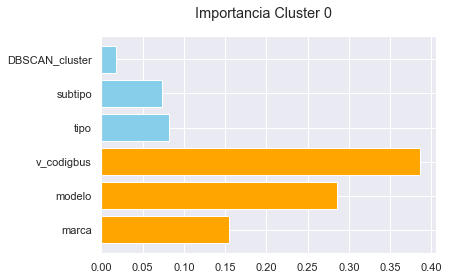

In [908]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))

print('\nTRAIN Cluster 0 ')
print("CV score=%0.4f" % ran_rf0.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp0=ran_rf0.best_params_
RF_ran0 = RandomForestClassifier(random_state=0,bootstrap= rbp0['bootstrap'],
                               class_weight=rbp0['class_weight'],
                               criterion=rbp0['criterion'],
                               max_depth=rbp0['max_depth'],
                               max_features=rbp0['max_features'],
                               min_samples_leaf=rbp0['min_samples_leaf'],
                               min_samples_split=rbp0['min_samples_split'],
                               n_estimators=rbp0['n_estimators'])

#Predicción
RF_ran0.fit(X_train0,y_train0)
y_pred0 = RF_ran0.predict(X_test0)
acc = accuracy_score(y_test0, y_pred0)
print ('PREDICCIÓN Cluster0 \n\n')
print ('Accuracy prediction: ', acc)
cr0=classification_report(y_test0, y_pred0, output_dict=True)
print('f1-core :%0.4f' %cr0['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test0, y_pred0))
print('\n')
importancia0=pd.DataFrame({ 'feature': X_test0.columns,'importancia': RF_ran0.feature_importances_})

print('Importancia Cluster 0:\n ',importancia0)
print('\n')
plt.suptitle('Importancia Cluster 0')
x=X_test0.columns
y=RF_ran0.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output0 = pd.DataFrame({ 'date': X_test0.index,'Real': y_test0, 'Predicho': y_pred0})

SISTEMA REFRIGERACIÓN
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 63, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 194, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}

TRAIN Cluster 1 
CV score=0.5762


PREDICCIÓN Cluster 1 


Accuracy prediction:  0.5995203836930456
f1-core :0.5995

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       230
           1       0.55      0.61      0.58       187

    accuracy                           0.60       417
   macro avg       0.60      0.60      0.60       417
weighted avg       0.60      0.60      0.60       417



Importancia Cluster 1:
       features  importancia
0       marca     0.129470
1      modelo     0.302113
2  v_codigbus     0.538427
3        tipo     0.029991




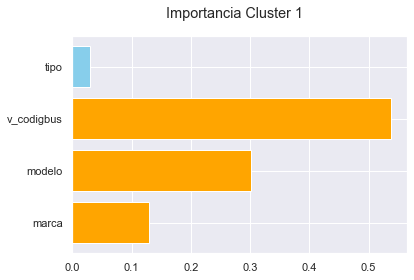

In [909]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))

print('\nTRAIN Cluster 1 ')
print("CV score=%0.4f" % ran_rf1.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp1=ran_rf1.best_params_
RF_ran1 = RandomForestClassifier(random_state=0,bootstrap= rbp1['bootstrap'],
                               class_weight=rbp1['class_weight'],
                               criterion=rbp1['criterion'],
                               max_depth=rbp1['max_depth'],
                               max_features=rbp1['max_features'],
                               min_samples_leaf=rbp1['min_samples_leaf'],
                               min_samples_split=rbp1['min_samples_split'],
                               n_estimators=rbp1['n_estimators'])

#Predicción
RF_ran1.fit(X_train1,y_train1)
y_pred1 = RF_ran1.predict(X_test1)
acc = accuracy_score(y_test1, y_pred1)
print ('PREDICCIÓN Cluster 1 \n\n')
print ('Accuracy prediction: ', acc)
cr1=classification_report(y_test1, y_pred1, output_dict=True)
print('f1-core :%0.4f' %cr1['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test1, y_pred1))
print('\n')
importancia1=pd.DataFrame({ 'features': X_test1.columns,'importancia': RF_ran1.feature_importances_})

print('Importancia Cluster 1:\n ',importancia1)
print('\n')
plt.suptitle('Importancia Cluster 1')

x=X_test1.columns
y=RF_ran1.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
output1 = pd.DataFrame({ 'date': X_test1.index,'Real': y_test1, 'Predicho': y_pred1})

In [914]:
importance0=RF_ran0.feature_importances_
importance1=RF_ran1.feature_importances_
#importance=((importance0+importance1)/2)


In [915]:
output= pd.concat([output0, output1], ignore_index=True)


In [916]:
important0= pd.DataFrame({ 'feature': X_test0.columns,'importancia': importance0,'vp':p0, 'imp_pond':importance0*p0,'cluster':0})
important1= pd.DataFrame({ 'feature': X_test1.columns,'importancia': importance1,'vp':p1,'imp_pond':importance1*p1,'cluster':1})

In [917]:
important0

,feature,importancia,vp,imp_pond,cluster
0,marca,0.154290,0.22,0.033944,0
1,modelo,0.286029,0.22,0.062926,0
2,v_codigbus,0.386642,0.22,0.085061,0
3,tipo,0.081557,0.22,0.017943,0
4,subtipo,0.073455,0.22,0.016160,0
5,DBSCAN_cluster,0.018027,0.22,0.003966,0


In [918]:
important1

,feature,importancia,vp,imp_pond,cluster
0,marca,0.129470,0.78,0.100986,1
1,modelo,0.302113,0.78,0.235648,1
2,v_codigbus,0.538427,0.78,0.419973,1
3,tipo,0.029991,0.78,0.023393,1


In [919]:
important = pd.concat([important0,important1], axis=0)
important

,feature,importancia,vp,imp_pond,cluster
0,marca,0.154290,0.22,0.033944,0
1,modelo,0.286029,0.22,0.062926,0
2,v_codigbus,0.386642,0.22,0.085061,0
3,tipo,0.081557,0.22,0.017943,0
4,subtipo,0.073455,0.22,0.016160,0
5,DBSCAN_cluster,0.018027,0.22,0.003966,0
0,marca,0.129470,0.78,0.100986,1
1,modelo,0.302113,0.78,0.235648,1
2,v_codigbus,0.538427,0.78,0.419973,1
3,tipo,0.029991,0.78,0.023393,1


In [920]:
imp=important.groupby('feature')['imp_pond'].sum()
imp

feature
DBSCAN_cluster    0.003966
marca             0.134930
modelo            0.298574
subtipo           0.016160
tipo              0.041336
v_codigbus        0.505034
Name: imp_pond, dtype: float64

PREDICCIÓN Combinada


Accuracy prediction:  0.6048689138576779
f1-core :0.6049

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       290
           1       0.56      0.64      0.60       244

    accuracy                           0.60       534
   macro avg       0.61      0.61      0.60       534
weighted avg       0.61      0.60      0.61       534



Importancia:
                        features  importancia
feature                                    
DBSCAN_cluster  DBSCAN_cluster     0.003966
marca                    marca     0.134930
modelo                  modelo     0.298574
subtipo                subtipo     0.016160
tipo                      tipo     0.041336
v_codigbus          v_codigbus     0.505034




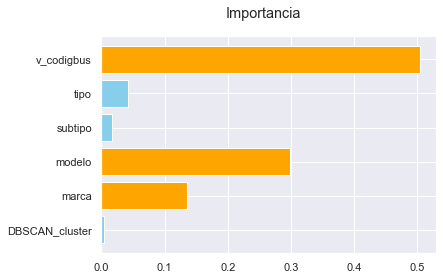

In [921]:
#Predicción combinada

acc = accuracy_score(output['Real'], output['Predicho'])
print ('PREDICCIÓN Combinada\n\n')
print ('Accuracy prediction: ', acc)
crc=classification_report(output['Real'],output['Predicho'], output_dict=True)
print('f1-core :%0.4f' %crc['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(output['Real'],  output['Predicho']))
print('\n')


importancia=pd.DataFrame({ 'features': imp.index,'importancia': imp})

print('Importancia:\n ',importancia)
print('\n')
plt.suptitle('Importancia')
x=imp.index
y=imp
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png')

In [922]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+
              'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
              'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+
              'RandomSearch Random Forest: '+'\n\n'+
              'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
              'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
              'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
              'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
              'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
              '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

C:\Users\Dani\AppData\Local\Temp/ipykernel_12976/534318981.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster0.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
C:\Users\Dani\AppData\Local\Temp/ipykernel_12976/534318981.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster1.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',


done


C:\Users\Dani\AppData\Local\Temp/ipykernel_12976/534318981.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\importancia.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',


## GridSearch

In [196]:

parameters_grid={'bootstrap': [True],
               'criterion':['entropy'],
               'max_depth': np.arange(100,200,1),
               'max_features':['log2'],
               'min_samples_leaf': np.arange(2,3,1),
               'min_samples_split':  np.arange(5,11,1),
               'class_weight':['balanced_subsample'],
               'n_estimators':np.arange(50,100,1)
            }
'''
parameters_grid={'bootstrap': [True],
               'criterion':['entropy'],
               'max_depth': np.arange(2,20,1),
               'max_features': ['sqrt'],
               'min_samples_leaf': np.arange(2,4,1),
               'min_samples_split': np.arange(4,8,1),
               'class_weight':['balanced_subsample'],
               'n_estimators': np.arange(100,150,1)
            }
'''

"\nparameters_grid={'bootstrap': [True],\n               'criterion':['entropy'],\n               'max_depth': np.arange(2,20,1),\n               'max_features': ['sqrt'],\n               'min_samples_leaf': np.arange(2,4,1),\n               'min_samples_split': np.arange(4,8,1),\n               'class_weight':['balanced_subsample'],\n               'n_estimators': np.arange(100,150,1)\n            }\n"

Best parameters from Randomsearch: {'n_estimators': 135, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.595

In [197]:
grid_rf = GridSearchCV(RF,parameters_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30000 candidates, totalling 150000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced_subsample'],
                         'criterion': ['entropy'],
                         'max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 1...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                         'max_features': ['log2'],
                         'min_samples_leaf': array([2]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,

In [ ]:
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print("CV score=%0.3f" % grid_rf.best_score_)
cv_results = grid_rf.cv_results_

Best parameters from Randomsearch: {'n_estimators': 135, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.595

Best parameters from Randomsearch: {'n_estimators': 45, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.593

SISTEMA REFRIGERACIÓN
GridSearch

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 84}



TRAIN 
CV score=0.589


PREDICCIÓN 


Accuracy prediction:  0.5972420351878269
f1-core :0.5972

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1062
           1       0.59      0.64      0.61      1041

    accuracy                           0.60      2103
   macro avg       0.60      0.60      0.60      2103
weighted avg       0.60      0.60      0.60      2103



Importancia:
        feature  importancia
0      modelo     0.269105
1  v_codigbus     0.403180
2      v_edad     0.327715


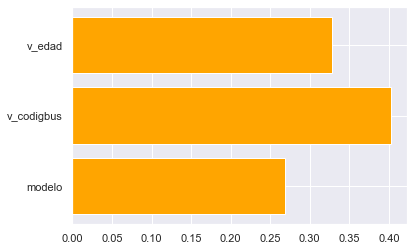

In [198]:
# constructor  GridSearch

print(target.upper()+'\n'+'GridSearch'+'\n')
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print ('\n')
print('\nTRAIN ')
print("CV score=%0.3f" % grid_rf.best_score_)
print ('\n')

from sklearn.inspection import permutation_importance


gbp=grid_rf.best_params_
RF_grid = RandomForestClassifier(random_state=0,bootstrap= gbp['bootstrap'],
                               class_weight=gbp['class_weight'],
                               criterion=gbp['criterion'],
                               max_depth=gbp['max_depth'],
                               max_features=gbp['max_features'],
                               min_samples_leaf=gbp['min_samples_leaf'],
                               min_samples_split=gbp['min_samples_split'],
                               n_estimators=gbp['n_estimators'])


#Predicción
RF_grid.fit(X_train,y_train)
y_pred = RF_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN \n\n')
print ('Accuracy prediction: ', acc)
cr=classification_report(y_test, y_pred, output_dict=True)
print('f1-core :%0.4f' %cr['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia:\n ',importancia)
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)




#Salida
output = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})


C:\Users\Dani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


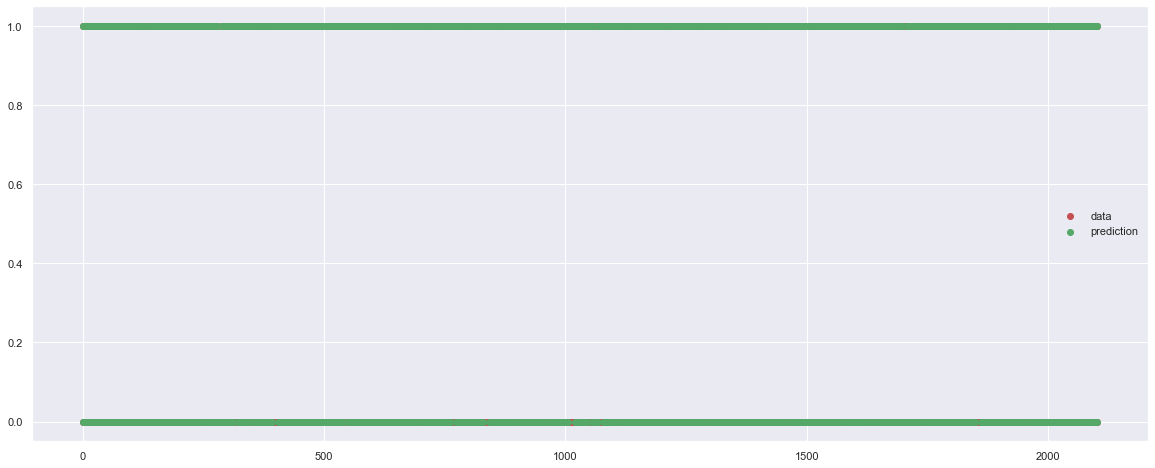

In [219]:
import numpy as np
plt.figure(figsize=(20,8))
xx = np.stack(i for i in range(y_test.shape[0]))
plt.scatter(xx, y_test, c='r', label='data',marker='o')
plt.scatter(xx, y_pred, c='g', label='prediction',marker='o')
plt.axis('tight')
plt.legend()


plt.show()

In [201]:
# NOTIFICACIÓN DE PROCESO TERMINADO GridSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'GridSearch Random Forest: '+'\n'+
              'Features :\n'+str(list(X_test.columns))+'\n\n'+
              str(grid_rf.best_params_)+'\n'+'Best Score :%0.4f' % grid_rf.best_score_+'\n'
              +'f1-score: %0.4f' % cr['accuracy']+'\n'+
              '0 : %0.4f' % cr['0']['f1-score']+'\n'+
              '1 : %0.4f' % cr['1']['f1-score'])

#enviarDocumento(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

done


SISTEMA REFRIGERACIÓN
GridSearch

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 84}



TRAIN 
CV score=0.5885


PREDICCIÓN 


Accuracy prediction:  0.6005706134094151
f1-core :0.6006

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1062
           1       0.59      0.64      0.61      1041

    accuracy                           0.60      2103
   macro avg       0.60      0.60      0.60      2103
weighted avg       0.60      0.60      0.60      2103



Importancia:
        feature  importancia
0      modelo     0.269105
1  v_codigbus     0.403180
2      v_edad     0.327715


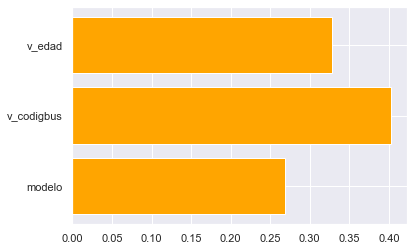

In [206]:
# Constructor
# constructor  GridSearch

print(target.upper()+'\n'+'GridSearch'+'\n')
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print ('\n')
print('\nTRAIN ')
print("CV score=%0.4f" % grid_rf.best_score_)
print ('\n')

from sklearn.inspection import permutation_importance


gbp=grid_rf.best_params_
RF_grid = RandomForestClassifier(random_state=0,bootstrap= True,
                               class_weight='balanced_subsample',
                               criterion='entropy',
                               max_depth=66,
                               max_features='log2',
                               min_samples_leaf=4,
                               min_samples_split=9,
                               n_estimators=34)


#Predicción
RF_grid.fit(X_train,y_train)
y_pred = RF_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN \n\n')
print ('Accuracy prediction: ', acc)
cr=classification_report(y_test, y_pred, output_dict=True)
print('f1-core :%0.4f' %cr['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia:\n ',importancia)
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)




#Salida
output = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})



# SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC # "Support vector classifier"
from scipy import stats


svc = SVC(probability = True, random_state = 0)
svc

'''
parameters_ran_svc={'C': np.arange(0.1, 2, 0.2),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.1, 1, 0.2),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }

parameters_ran_svc={'C': np.arange(0.6, 1, 0.02),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 1, 0.02),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }
'''                   
parameters_ran_svc={'C': np.arange(0.68, 0.8, 0.01),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 0.7, 0.01),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['balanced']
                   }

In [123]:
ran_svc=RandomizedSearchCV(svc,parameters_ran_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0) 
ran_svc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79]),
                                        'class_weight': ['balanced'],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': array([0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69])},
                   random_state=0, scoring='accuracy', verbose=1)

print("Best parameters from Randomsearch: {}".format(ran_svc.best_params_))
print("CV score=%0.3f" % ran_svc.best_score_)
cv_results = ran_svc.cv_results_

parameters_grid_svc={'C': np.arange(0.75, 0.9, 0.01),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 0.7, 0.01),
                    'decision_function_shape':['ovo'],
                    'class_weight': ['balanced']
                   }


grid_svc = GridSearchCV(svc,parameters_grid_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_svc.fit(X_train,y_train)

Best parameters from Randomsearch: {'gamma': 0.67, 'decision_function_shape': 'ovo', 'class_weight': 'balanced', 'C': 0.7900000000000001}
CV score=0.595

print("Best parameters from gridsearch: {}".format(grid_svc.best_params_))
print("CV score=%0.3f" % grid_svc.best_score_)
cv_results = grid_svc.cv_results_

# constructor
test=X_test
svc = SVC(probability = True, random_state = 0,
          C=0.85 ,
          gamma= 0.69,
          decision_function_shape='ovo',
          class_weight='balanced')

#Predicción
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Accuracy: ', acc)

#Salida
output_svr = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})

print('DECISION TREE CLASSIFIER \n')
print(classification_report(y_test, y_pred))

sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
sound.play()